In [1]:
import os
import sys
import numpy as np

import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

In [7]:
root_path = '/content/drive/MyDrive/pixel_accuracy/'
test_list = ['00002232.jpg','00004818.jpg', '00002277.jpg']
label_list = ['mask_00002232.png','mask_00004818.png', 'mask_00002277.png']

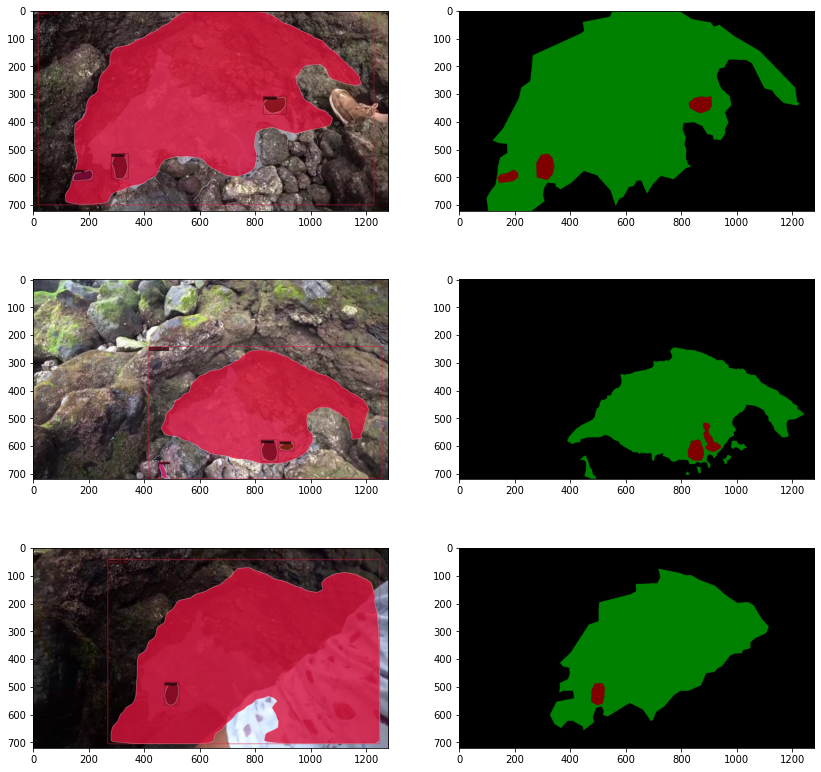

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

for i in range(len(test_list)):
    img_root = root_path + test_list[i]
    test_img = Image.open(img_root).convert('RGB')

    img_root = root_path + label_list[i]
    label_img = Image.open(img_root).convert('RGB')
    
    axes[i, 0].imshow(test_img)
    axes[i, 1].imshow(label_img)

In [9]:
import torch
import torchvision

In [10]:
def pixel_accuracy(test, mask):
    output, idx = torch.topk(test, k=1, dim=-1)
    mask, idx2 = torch.topk(mask, k=1, dim=-1)
    correct = torch.eq(idx+output, idx2+mask).int()
    accuracy = float(correct.sum()) / float(correct.numel())
    return accuracy

In [11]:
path_2232 = '/content/drive/MyDrive/pixel_accuracy/00002232.png'
path_2277 = '/content/drive/MyDrive/pixel_accuracy/00002277.png'
path_4818 = '/content/drive/MyDrive/pixel_accuracy/00004818.png'

mask_2232 = '/content/drive/MyDrive/pixel_accuracy/mask_00002232.png'
mask_2277 = '/content/drive/MyDrive/pixel_accuracy/mask_00002277.png'
mask_4818 = '/content/drive/MyDrive/pixel_accuracy/mask_00004818.png'

In [29]:
img_2232 = Image.open(path_2232).convert('RGB')
img_2232 = np.array(img_2232)
np.unique(img_2232)

array([  0, 128], dtype=uint8)

In [25]:
img_2232 = Image.open(path_2232).convert('RGB')
img_2232 = np.array(img_2232)
img_2232 = torch.Tensor(img_2232)

mask_2232 = Image.open(mask_2232).convert('RGB')
mask_2232 = np.array(mask_2232)
mask_2232 = torch.Tensor(mask_2232)

pixel_accuracy3(img_2232, mask_2232)

0.9279817708333333

In [13]:
img_2277 = Image.open(path_2277).convert('RGB')
img_2277 = np.array(img_2277)
img_2277 = torch.Tensor(img_2277)

mask_2277 = Image.open(mask_2277).convert('RGB')
mask_2277 = np.array(mask_2277)
mask_2277 = torch.Tensor(mask_2277)

pixel_accuracy(img_2277, mask_2277)

0.760703125